<u><b>PROBLEM STATEMENT</u></b>

Your company is expanding into new industries to diversify its portfolio. Specifically, 
1. <i>Interested in purchasing and operating airplanes for commercial and private enterprises</i> 
2. <i>Do not know anything about the potential risks of aircraft.</i>
3. <i>Determining which aircraft are the lowest risk for the company to start this new business endeavor.</i>
4. <i>Translate your findings into actionable insights to help decide which aircraft to purchase.</i>

In [153]:
# importing needed modules
import pandas as pd
import csv

## Data Loading and Initial Inspection

In this step, we load the aviation dataset from a CSV file into a Pandas DataFrame.

After loading the data, we display the first five rows of the dataset using the `head()` method. 

In [154]:
# reading the csv file
df = pd.read_csv('Aviation_Data.csv')
df.head()

c:\Users\SHIRU\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Checking for Missing Values

Next we identify missing values in the dataset, as they can affect results. we use the `isna()` method combined with `sum()` to:
- Detect the presence of missing values in each column
- Quantify how many values are missing per column

In [155]:
# checking for null values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

## Identifying and Removing Duplicate Records

Next step is checking for duplicate records and remove them before proceeding with further analysis.

we use the `duplicated()` method combined with `sum()` to:
- Identify whether duplicate rows exist in the dataset
- Count the total number of duplicated records
- Then remove them using `dropna()` method

In [156]:
# checking for duplicates
df.duplicated().sum()


1390

In [157]:
# dropping duplicate
df.drop_duplicates(inplace=True)


In [158]:
df.duplicated().sum()

0

## Selecting Relevant Columns
Next we select the columns that are needed to make our analysis successful

In [159]:
# converting the df into dataframe for indexing
df = pd.DataFrame(df) 
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [160]:
# selecting the needed columns to work for analysis
df_1 = df[['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Make', 'Model', 'Aircraft.Category', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type','Purpose.of.flight']]
df_1.head()

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight
0,Fatal(2),2.0,0.0,0.0,0.0,Stinson,108-3,NaN,Destroyed,No,1.0,Reciprocating,Personal
1,Fatal(4),4.0,0.0,0.0,0.0,Piper,PA24-180,NaN,Destroyed,No,1.0,Reciprocating,Personal
2,Fatal(3),3.0,NaN,NaN,NaN,Cessna,172M,NaN,Destroyed,No,1.0,Reciprocating,Personal
3,Fatal(2),2.0,0.0,0.0,0.0,Rockwell,112,NaN,Destroyed,No,1.0,Reciprocating,Personal
4,Fatal(1),1.0,2.0,NaN,0.0,Cessna,501,NaN,Destroyed,No,NaN,NaN,Personal


## Filtering the Dataset by Aircraft Category

Now we focus on aircraft categorized as **Airplanes**. This removes other aircraft types (such as helicopters or gliders) that may have different operational characteristics and risk profiles.

By filtering the dataset to include only rows where the `Aircraft.Category` is `"Airplane"`, we:
- Maintain consistency in the type of aircraft being analyzed
- Improve the relevance and comparability of the results

In [161]:
# filtering out the airplane category
df_1 = df_1[df_1['Aircraft.Category'] == 'Airplane']
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight
5,Non-Fatal,NaN,NaN,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,Non-Fatal,0.0,0.0,0.0,1.0,PIPER,PA42,Airplane,Substantial,No,2.0,NaN,NaN
90332,Non-Fatal,0.0,0.0,0.0,1.0,CIRRUS DESIGN CORP,SR22,Airplane,Substantial,No,1.0,NaN,Personal
90335,Non-Fatal,0.0,0.0,0.0,1.0,SWEARINGEN,SA226TC,Airplane,Substantial,No,2.0,NaN,NaN
90336,Minor,0.0,1.0,0.0,0.0,CESSNA,R172K,Airplane,Substantial,No,1.0,NaN,Personal


In [162]:
# looking for null values after filtering and narrowing down into airplane category
df_1.isna().sum()


Injury.Severity            814
Total.Fatal.Injuries      3165
Total.Serious.Injuries    3224
Total.Minor.Injuries      2878
Total.Uninjured            900
Make                         9
Model                       31
Aircraft.Category            0
Aircraft.damage           1282
Amateur.Built               17
Number.of.Engines         2754
Engine.Type               4226
Purpose.of.flight         3739
dtype: int64

Here we combine the `Make` and `Model` columns into a single variable named `Airplane.Type`. This creates a unified identifier for each aircraft type ie Airplane.

In [163]:
# merging the make and model columns to a variable called aircrafts
df_1['Airplane.Type'] = df_1['Make'] + ' ' + df_1['Model']
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,NaN,NaN,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,Non-Fatal,0.0,0.0,0.0,1.0,PIPER,PA42,Airplane,Substantial,No,2.0,NaN,NaN,PIPER PA42
90332,Non-Fatal,0.0,0.0,0.0,1.0,CIRRUS DESIGN CORP,SR22,Airplane,Substantial,No,1.0,NaN,Personal,CIRRUS DESIGN CORP SR22
90335,Non-Fatal,0.0,0.0,0.0,1.0,SWEARINGEN,SA226TC,Airplane,Substantial,No,2.0,NaN,NaN,SWEARINGEN SA226TC
90336,Minor,0.0,1.0,0.0,0.0,CESSNA,R172K,Airplane,Substantial,No,1.0,NaN,Personal,CESSNA R172K


In [164]:
# checking for null values after merging the two columns
df_1.isna().sum()

Injury.Severity            814
Total.Fatal.Injuries      3165
Total.Serious.Injuries    3224
Total.Minor.Injuries      2878
Total.Uninjured            900
Make                         9
Model                       31
Aircraft.Category            0
Aircraft.damage           1282
Amateur.Built               17
Number.of.Engines         2754
Engine.Type               4226
Purpose.of.flight         3739
Airplane.Type               37
dtype: int64

In [165]:
# dropping the null values in the new column called Airplane.Type, the make column and the model column
df_1.dropna(subset=['Airplane.Type', 'Make', 'Model'], inplace=True)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,NaN,NaN,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,Non-Fatal,0.0,0.0,0.0,1.0,PIPER,PA42,Airplane,Substantial,No,2.0,NaN,NaN,PIPER PA42
90332,Non-Fatal,0.0,0.0,0.0,1.0,CIRRUS DESIGN CORP,SR22,Airplane,Substantial,No,1.0,NaN,Personal,CIRRUS DESIGN CORP SR22
90335,Non-Fatal,0.0,0.0,0.0,1.0,SWEARINGEN,SA226TC,Airplane,Substantial,No,2.0,NaN,NaN,SWEARINGEN SA226TC
90336,Minor,0.0,1.0,0.0,0.0,CESSNA,R172K,Airplane,Substantial,No,1.0,NaN,Personal,CESSNA R172K


In this dataset, some columns contain missing values, which can interfere with calculations.

So we replace missing values (`NaN`) with `0` in the following columns:
- `Total.Fatal.Injuries`, `Total.Minor.Injuries`, `Total.Serious.Injuries`, `Total.Uninjured`

In [166]:
# replacing the nan values with 0 in the Total.Fatal.Injuries column, Total.Minor.Injuries, Total.Serious.Injuries and Total.Uninjured
df_1['Total.Fatal.Injuries'] = df_1['Total.Fatal.Injuries'].fillna(0)
df_1['Total.Minor.Injuries'] = df_1['Total.Minor.Injuries'].fillna(0)
df_1['Total.Serious.Injuries'] = df_1['Total.Serious.Injuries'].fillna(0)
df_1['Total.Uninjured'] = df_1['Total.Uninjured'].fillna(0)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,Non-Fatal,0.0,0.0,0.0,1.0,PIPER,PA42,Airplane,Substantial,No,2.0,NaN,NaN,PIPER PA42
90332,Non-Fatal,0.0,0.0,0.0,1.0,CIRRUS DESIGN CORP,SR22,Airplane,Substantial,No,1.0,NaN,Personal,CIRRUS DESIGN CORP SR22
90335,Non-Fatal,0.0,0.0,0.0,1.0,SWEARINGEN,SA226TC,Airplane,Substantial,No,2.0,NaN,NaN,SWEARINGEN SA226TC
90336,Minor,0.0,1.0,0.0,0.0,CESSNA,R172K,Airplane,Substantial,No,1.0,NaN,Personal,CESSNA R172K


In [167]:
# dropping the nan values in the engine type column
df_1.dropna(subset=['Engine.Type'], inplace=True)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500


In [168]:
# checking the number of null values after dropping the nan values in the engine type column
df_1.isna().sum()

Injury.Severity            178
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Make                         0
Model                        0
Aircraft.Category            0
Aircraft.damage            610
Amateur.Built                6
Number.of.Engines          667
Engine.Type                  0
Purpose.of.flight         1569
Airplane.Type                0
dtype: int64

In [169]:
# replacing the nan values in the number of engine with 0
df_1['Number.of.Engines'] = df_1['Number.of.Engines'].fillna(0)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500


In [170]:
# checking the number of null values after replacing the nan values in the number of engine with 0
df_1.isna().sum()

Injury.Severity            178
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Make                         0
Model                        0
Aircraft.Category            0
Aircraft.damage            610
Amateur.Built                6
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight         1569
Airplane.Type                0
dtype: int64

In [171]:
# dropping the null values in the Amateur.Built column cause we only one if its an amateur built or not
df_1.dropna(subset=['Amateur.Built'], inplace=True)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500


In [172]:
# checking the number of null values after dropping the null values in the Amateur.Built column
df_1.isna().sum()

Injury.Severity            178
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Make                         0
Model                        0
Aircraft.Category            0
Aircraft.damage            610
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight         1567
Airplane.Type                0
dtype: int64

In [173]:
# dropping the mising values in the aircraft damage column cause we only want to see the type of damage being experienced
df_1.dropna(subset=['Aircraft.damage'], inplace=True)
df_1


,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500


In [174]:
# checking the number of null values after dropping the mising values in the aircraft damage column
df_1.isna().sum()   

Injury.Severity             69
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Make                         0
Model                        0
Aircraft.Category            0
Aircraft.damage              0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight         1140
Airplane.Type                0
dtype: int64

In [175]:
# looking at the injury severity column
injury_severity = df_1['Injury.Severity'].unique()
injury_severity

array(['Non-Fatal', 'Fatal(1)', 'Fatal(2)', 'Fatal(3)', 'Incident',
       'Fatal(8)', 'Fatal(4)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(12)', 'Fatal(14)', 'Fatal(11)', 'Fatal(17)', 'Fatal(10)',
       'Fatal(27)', 'Fatal(16)', 'Fatal(54)', 'Fatal(160)', 'Fatal(97)',
       'Fatal(125)', 'Unavailable', 'Fatal(35)', 'Fatal(228)', 'Fatal(9)',
       'Fatal(18)', 'Fatal(169)', 'Fatal(131)', 'Fatal(13)', 'Fatal(24)',
       'Fatal(65)', 'Fatal(113)', 'Fatal', nan, 'Minor', 'Serious'],
      dtype=object)

In [176]:
# dropping the nan values apprearing on the Injury.Severity column
df_1.dropna(subset=['Injury.Severity'], inplace=True)
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500


In [177]:
# checking the number of null values after dropping the nan values in the Injury.Severity column
df_1.isna().sum()

Injury.Severity              0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Make                         0
Model                        0
Aircraft.Category            0
Aircraft.damage              0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight         1084
Airplane.Type                0
dtype: int64

## Statistics of Numeric Data

Next we perform The `describe()` method provides a quick statistical overview

In [178]:
# looking at the statistics of the numeric data in the dataframe
df_1.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
count,22682.000000,22682.000000,22682.000000,22682.000000,22682.000000
mean,0.404682,0.245128,0.220704,3.095230,1.095362
std,3.315584,1.587298,2.977534,20.787365,0.393766
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,228.000000,137.000000,380.000000,588.000000,8.000000


## Data Analysis


##### Calculating Total Injuries
To quantify the overall risk associated with each airplane type, we create a new column `Total.Injuries` by summing the different types of injuries:
`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`

This provides a single measure of risk per airplane type, making it easier to compare and rank aircraft based on historical incident data.  


In [179]:
df_1['Total.Injuries'] = df_1['Total.Fatal.Injuries'] + df_1['Total.Serious.Injuries'] + df_1['Total.Minor.Injuries']
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type,Total.Injuries
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9,1.0
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140,0.0
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B,0.0
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A,1.0
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150,0.0
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG,0.0
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60,0.0
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500,1.0


##### Creating a Weighted Risk Score

we create a **`Risk.Score`** by assigning weights to each injury type for better capturing of the severity incidents that will help us come up with better analysis

- **Fatal injuries** = 3 points  
- **Serious injuries** = 2 points  
- **Minor injuries** = 1 point  


In [180]:
df_1['Risk.Score'] = df_1['Total.Fatal.Injuries']*3 + df_1['Total.Serious.Injuries']*2 + df_1['Total.Minor.Injuries']*1
df_1

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type,Total.Injuries,Risk.Score
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,Mcdonnell Douglas DC9,1.0,1.0
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,Cessna 140,0.0,0.0
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,Cessna 401B,0.0,0.0
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Bellanca 17-30A,1.0,1.0
13,Fatal(1),1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,Cessna R172K,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,0.0,0.0,0.0,1.0,CESSNA,150,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 150,0.0,0.0
90106,Non-Fatal,0.0,0.0,0.0,2.0,CESSNA,177RG,Airplane,Substantial,No,1.0,Reciprocating,Personal,CESSNA 177RG,0.0,0.0
90120,Non-Fatal,0.0,0.0,0.0,1.0,BEECH,B-60,Airplane,Substantial,No,2.0,Reciprocating,Personal,BEECH B-60,0.0,0.0
90194,Minor,0.0,1.0,0.0,0.0,STEPHEN J HOFFMAN,MS-500,Airplane,Substantial,Yes,1.0,Reciprocating,ASHO,STEPHEN J HOFFMAN MS-500,1.0,2.0


##### `Injuries Encountered` vs `Airplane.Type`

In [181]:
# counting how many time each item in the column 'Airplane.Type' appears
df_1['Airplane.Type'].value_counts()

CESSNA 172                         372
Cessna 172                         364
Cessna 152                         253
CESSNA 172S                        161
CESSNA 152                         159
                                  ... 
Globe Swift GC1B                     1
Shaffer KR-2                         1
Rose-Rhinehart A4-C                  1
JOHNSON KENNETH SUPER CUB SPORT      1
MAULE M-7-420AC                      1
Name: Airplane.Type, Length: 7325, dtype: int64

In [182]:
# changing the items in the column 'Airplane.Type' all to lowercase so that case each represent the same thing ie CESSNA 172 and cessna 172 are the same
df_1['Airplane.Type'] = df_1['Airplane.Type'].str.lower()


In [183]:
df_1['Airplane.Type'].value_counts()

cessna 172                      736
cessna 152                      412
cessna 172n                     297
cessna 182                      285
cessna 172s                     251
                               ... 
cessna 172 - f                    1
paul b. johnson avid mark iv      1
air tractor inc at                1
hall steven c lancair le          1
langley tri-quickie               1
Name: Airplane.Type, Length: 6436, dtype: int64

Looking at the above detail, cessna 175 airplane appears 736 times each having different number of `Total.Injuries` values, so to make the calculation sensible, we will aggregate the column `Airplane.Type` and `Total.Injuries` so that it sums up the total injuries that happened in each airplane type count

In [184]:
# how often each aircraft is involved in incidents
risk_per_incident = df_1.groupby('Airplane.Type').agg(total_injuries=('Total.Injuries', 'sum'),number_of_occurance=('Airplane.Type', 'count'))
risk_per_incident


,total_injuries,number_of_occurance
Airplane.Type,,
177mf llc pitts model 12,2.0,1
2007 savage air llc epic lt,0.0,1
2021fx3 llc ccx-2000,0.0,1
3xtrim 450 ultra,2.0,1
781569 inc fx 210,3.0,1
...,...,...
zlin savage,0.0,1
zlin z143,0.0,1
zlin z242l,1.0,1


Next we find the average number of injuries that happended in each `Airplane.Type`

In [185]:
# creating a new column that will have the average number of injuries per incident
risk_per_incident['Average_Injuries_encountered'] = (risk_per_incident['total_injuries'] / risk_per_incident['number_of_occurance'])
risk_per_incident

,total_injuries,number_of_occurance,Average_Injuries_encountered
Airplane.Type,,,
177mf llc pitts model 12,2.0,1,2.0
2007 savage air llc epic lt,0.0,1,0.0
2021fx3 llc ccx-2000,0.0,1,0.0
3xtrim 450 ultra,2.0,1,2.0
781569 inc fx 210,3.0,1,3.0
...,...,...,...
zlin savage,0.0,1,0.0
zlin z143,0.0,1,0.0
zlin z242l,1.0,1,1.0


In [186]:
# Selecting airplane with more than ten incident
incidents_above10 = risk_per_incident[risk_per_incident['number_of_occurance'] >10]
incidents_above10


,total_injuries,number_of_occurance,Average_Injuries_encountered
Airplane.Type,,,
aero commander 100,11.0,13,0.846154
aero commander s2r,9.0,19,0.473684
aeronca 11ac,25.0,31,0.806452
aeronca 7ac,54.0,90,0.600000
aeronca 7bcm,7.0,12,0.583333
...,...,...,...
stinson 108-2,12.0,14,0.857143
stinson 108-3,16.0,19,0.842105
taylorcraft bc12-d,27.0,37,0.729730


In [187]:
# Selecting lowest-risk airplane type top 20
safest_aircraft = incidents_above10.sort_values('Average_Injuries_encountered').head(20).round(3)
safest_aircraft

,total_injuries,number_of_occurance,Average_Injuries_encountered
Airplane.Type,,,
diamond aircraft ind inc da 20 c1,0.0,11,0.000
cessna 172sp,0.0,12,0.000
maule m-5-210c,1.0,13,0.077
air tractor at-502b,1.0,12,0.083
cessna t188c,2.0,24,0.083
cessna 195,4.0,36,0.111
cessna 402c,2.0,18,0.111
piper pa-32-301,3.0,20,0.150
cessna 195a,2.0,13,0.154


In [188]:
# importing matplotlib module
import matplotlib.pyplot as plt


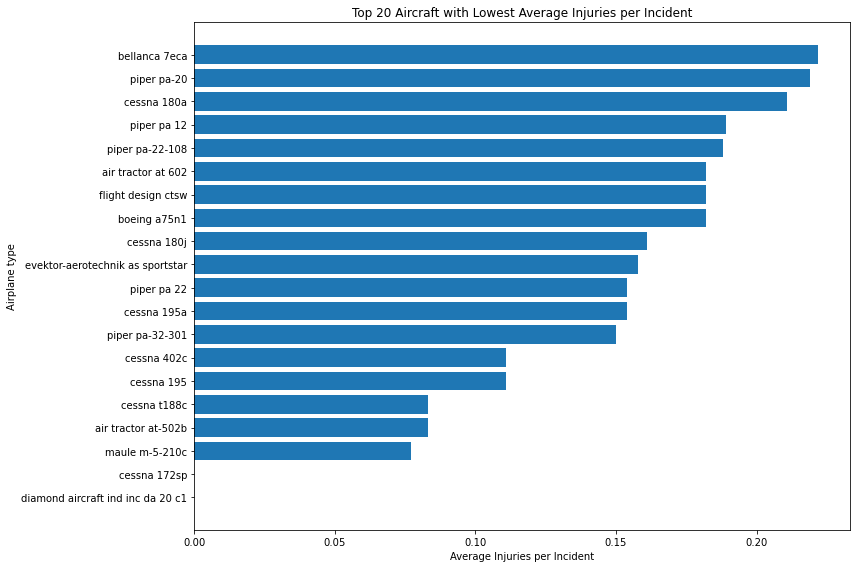

In [189]:
# visualizing the safest aircraft
plt.figure(figsize=(12,8))
plt.barh(safest_aircraft.index,safest_aircraft['Average_Injuries_encountered'])
plt.title('Top 20 Aircraft with Lowest Average Injuries per Incident')
plt.xlabel('Average Injuries per Incident')
plt.ylabel('Airplane type')
plt.tight_layout()
plt.show()

#### Analysis on `Average_Injuries_encountered` vs `Airplane.Type`
- Airplane <b>'diamond aircraft ind inc da 20 c1' and 'cessna 172sp'</b> recorded zero injuries across multiple incidents, indicating the <b>lowest operational risk</b> in the dataset.

- Several airplane types e.g <b>'maule m-5-210c', 'air tractor at-502b', 'cessna T188c'</b> show <b>very low injury risk</b>, but not zero.

- While <b>'bellanca 7eca', 'piper pa-20' and 'cessna 180a'</b> present <b>greater operational risk</b> and are <b>less suitable for initial investment</b>, because they have <i>higher average injuries per incident</i>

<b>Recommendation</b>- Aircraft with consistently low or zero average injuries per incident particularly the DA 20 C1 and Cessna 172SP are the safest and most reliable options to prioritize for purchase.

##### `Risk.Score` vs `Airplane.Type`

In [190]:
# Risk.score vs Airplane.Type
airplane_type_risk = df_1.groupby('Airplane.Type')['Risk.Score'].mean().sort_values()
airplane_type_risk

Airplane.Type
zwicker murray r glastar      0.0
gates lear jet 35             0.0
gates lear jet 35a            0.0
gates learjet 24d             0.0
gates learjet 25              0.0
                            ...  
boeing 777-200er            333.0
boeing 747-2b6b             380.0
boeing b757                 488.0
airbus industrie a 310      517.0
boeing 747-300              736.0
Name: Risk.Score, Length: 6436, dtype: float64

In [191]:
# top 20 aircraft with highest risk score
highest_risk_aircraft = airplane_type_risk.sort_values(ascending= False).head(20).round()
highest_risk_aircraft

Airplane.Type
boeing 747-300              736.0
airbus industrie a 310      517.0
boeing b757                 488.0
boeing 747-2b6b             380.0
boeing 777-200er            333.0
fokker 100                  301.0
boeing 737-400              204.0
boeing 737-200              196.0
boeing 767-200er            195.0
embraer erj190              148.0
sukhoi sj100                132.0
airbus a321                 118.0
fokker 28-4000              111.0
airbus a320                  92.0
airbus a330                  82.0
embraer emb110               80.0
airbus a320 - 211            56.0
aviocar casa c212            54.0
bombardier inc dhc-8-402     49.0
boeing 737 7h4               46.0
Name: Risk.Score, dtype: float64

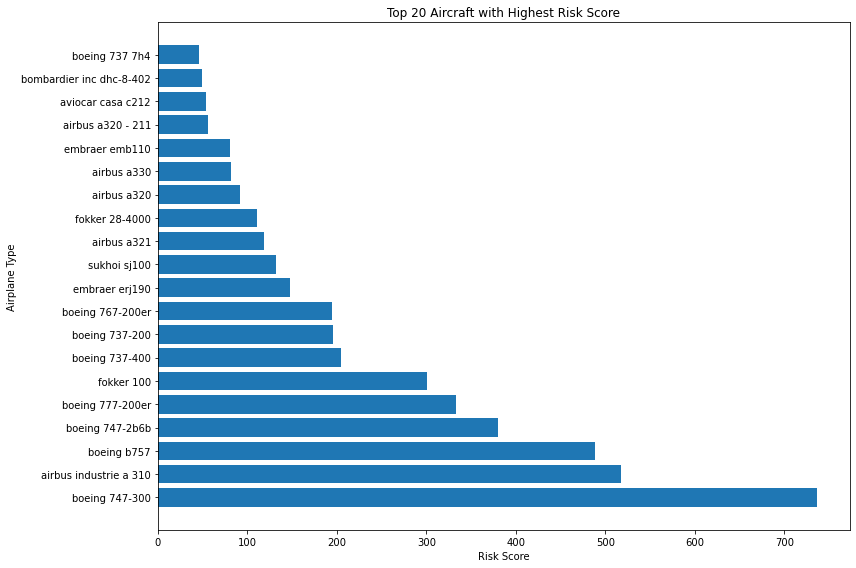

In [192]:
# visualizing the top 20 aircraft with highest risk score
plt.figure(figsize=(12,8))
plt.barh(highest_risk_aircraft.index,highest_risk_aircraft.values)
plt.title('Top 20 Aircraft with Highest Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Airplane Type')
plt.tight_layout()
plt.show()

#### Risk Analysis Based on Weighted `Risk.Score` vs `Airplane.Type`
Airplanes with the <b>highest Risk.Scores</b> include: boeing 747-300(736), airbus a310(517), boeing 757(488) and boeing 747-2b6b(380)

These are large, long-haul commercial airplanes. <u>Their high scores reflect severe injury outcomes</u> when accidents occur and they will represent high operational risk to the company if purchase is made.



<b>Mid-range Risk.Scores</b> include: boeing 737-400 / 737-200, boeing 767-200re, embraer erj190, airbus a321 / a320

These airplanes show <b>lower risk</b>, but still <u>involve significant injury severity</u><b> Suitable only if the company has strong safety systems</b>

<b>Lowest Risk.Scores</b> include: bombardier DHC-8-402 (49), boeing 737-7H4 (46), aviocar CASA C212 (54), airbus A320-211 (56)

These airplanes <u>have lower weighted injury impact</u> and present a <b>more manageable risk profile</b> making it better aligned with a gradual and safer market entry

<b>Recommendation</b>- Airplanes with <b>lower weighted injury severity</b> offer the <u>safest and most practical entry point</u> for the company if bought

##### `Number of Engines` vs `Aircraft damage`

In [193]:
# Number.of.Enginee vs Aircraft.damage
engines_aircraft_risk = df_1.groupby('Aircraft.damage')['Number.of.Engines'].sum().sort_values()
engines_aircraft_risk

Aircraft.damage
Unknown            8.0
Minor            859.0
Destroyed       3066.0
Substantial    20912.0
Name: Number.of.Engines, dtype: float64

In [194]:
# removing the 'unknown' category
engines_aircraft_risk = engines_aircraft_risk.drop('Unknown')
engines_aircraft_risk


Aircraft.damage
Minor            859.0
Destroyed       3066.0
Substantial    20912.0
Name: Number.of.Engines, dtype: float64

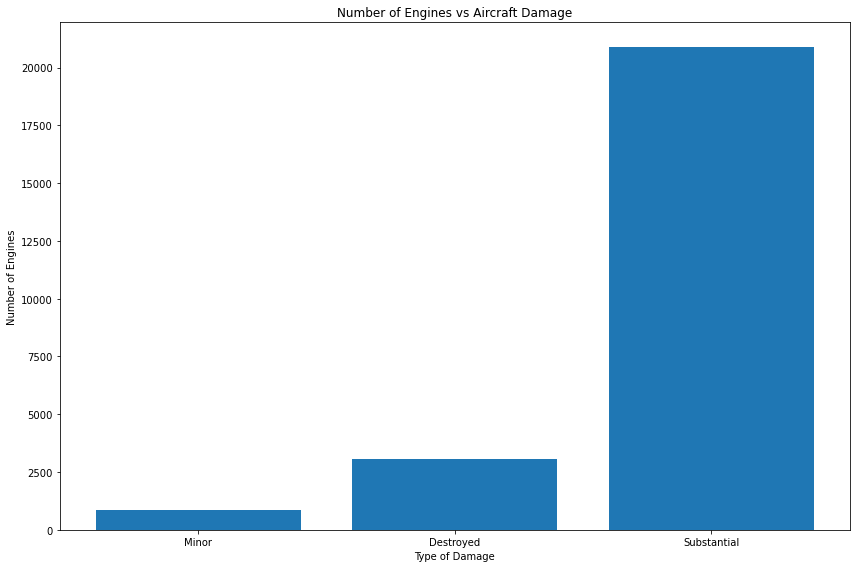

In [195]:
# plotting the bargraph for engines_aircraft_risk

Damage= engines_aircraft_risk
plt.figure(figsize=(12,8))
plt.bar(engines_aircraft_risk.index, engines_aircraft_risk.values)

plt.title('Number of Engines vs Aircraft Damage')
plt.xlabel('Type of Damage')
plt.ylabel('Number of Engines')

plt.tight_layout()
plt.show()

#### Analysis based on `Aircraft.Damage` vs `Engine.Type`
- <b>The higher the number of engine, the higher the impact of the damaged received by the plane</b>

Substantial Damage dominates meaning most historical incidents lead to significant aircraft impairment, <u>increasing repair and maintenance costs</u>

Destroyed damage follows next <u>representing high-risk investments</u>, particularly for a company with no aviation experience.

Minor damage comes in last suggesting that, they are <u>far less frequent than severe events.</u>

<b>Recommendation</b>- For a company entering aviation, airplanes with fewer substantial and destroyed incidents provide the safest and most cost-effective options.

Combine all needed data tables (Average Injuries, Risk.Score, Damage Severity, Injury Severity) into a single actionable aircraft ranking

In [196]:
# Injury Severity dustribution vs Airplane.Type
distribution = df_1.groupby(['Airplane.Type','Injury.Severity'])['Injury.Severity'].count()
distribution

Airplane.Type                Injury.Severity
177mf llc pitts model 12     Non-Fatal          1
2007 savage air llc epic lt  Non-Fatal          1
2021fx3 llc ccx-2000         Non-Fatal          1
3xtrim 450 ultra             Fatal              1
781569 inc fx 210            Non-Fatal          1
                                               ..
zlin savage                  Non-Fatal          1
zlin z143                    Non-Fatal          1
zlin z242l                   Fatal              1
zubair s khan raven          Fatal              1
zwicker murray r glastar     Non-Fatal          1
Name: Injury.Severity, Length: 7767, dtype: int64

In [197]:
# checking the unique severity
unique_severity = df_1['Injury.Severity'].unique()
unique_severity


array(['Non-Fatal', 'Fatal(1)', 'Fatal(2)', 'Fatal(3)', 'Incident',
       'Fatal(8)', 'Fatal(4)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(12)', 'Fatal(14)', 'Fatal(11)', 'Fatal(17)', 'Fatal(10)',
       'Fatal(27)', 'Fatal(16)', 'Fatal(54)', 'Fatal(160)', 'Fatal(97)',
       'Fatal(125)', 'Unavailable', 'Fatal(35)', 'Fatal(228)', 'Fatal(9)',
       'Fatal(18)', 'Fatal(169)', 'Fatal(131)', 'Fatal(13)', 'Fatal(24)',
       'Fatal(65)', 'Fatal(113)', 'Fatal', 'Minor', 'Serious'],
      dtype=object)

From unique_severity above we get to see the injury severity column has severity category (Fatal, Serious, Minor, Non-Fatal, Incident) and the fatality counts as text ie Fatal(12). This makes it hard for as to visualize our analysis so to fix this we;
1. Assign the categories one particular value, ie an instance of `Fatal()` we assign it to 'Fatal'
2. `Minor` we assign it 'Minor'
3. `Incident` we assign it 'Incident
4. `Serious` we assign it 'Serious'
5. `Non-Fatal` we assign it to 'Non-Fatal'

In [198]:
# Assign the categories one particular value, ie an instance of `Fatal()` we assign it to 'Fatal', an instance of `Minor` we assign it 'Minor' an instance of `Incident` we assign it 'Incident an instance of `Serious` we assign it 'Serious' an instance of `Non-Fatal` we assign it to 'Non-Fatal'

severity_mapping = {
    'Fatal(1)': 'Fatal',
    'Fatal(2)': 'Fatal',
    'Fatal(3)': 'Fatal',
    'Fatal(4)': 'Fatal',
    'Fatal(5)': 'Fatal',
    'Fatal(6)': 'Fatal',
    'Fatal(7)': 'Fatal',
    'Fatal(8)': 'Fatal',
    'Fatal(9)': 'Fatal',
    'Fatal(10)': 'Fatal',
    'Fatal(11)': 'Fatal',
    'Fatal(12)': 'Fatal',
    'Fatal(13)': 'Fatal',
    'Fatal(14)': 'Fatal',
    'Fatal(16)': 'Fatal',
    'Fatal(17)': 'Fatal',
    'Fatal(18)': 'Fatal',
    'Fatal(24)': 'Fatal',
    'Fatal(27)': 'Fatal',
    'Fatal(35)': 'Fatal',
    'Fatal(54)': 'Fatal',
    'Fatal(65)': 'Fatal',
    'Fatal(97)': 'Fatal',
    'Fatal(113)': 'Fatal',
    'Fatal(125)': 'Fatal',
    'Fatal(160)': 'Fatal',
    'Fatal(169)': 'Fatal',
    'Fatal(228)': 'Fatal',
    'Fatal': 'Fatal',
    'Minor': 'Minor',
    'Serious': 'Serious',
    'Incident': 'Incident',
    'Non-Fatal': 'Non-Fatal',
    'Unavailable': 'Unavailable'
}

df_1['Injury.Severity'] = df_1['Injury.Severity'].map(severity_mapping)
df_1.head()

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type,Total.Injuries,Risk.Score
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,mcdonnell douglas dc9,1.0,1.0
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,cessna 140,0.0,0.0
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,cessna 401b,0.0,0.0
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,bellanca 17-30a,1.0,1.0
13,Fatal,1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,cessna r172k,1.0,3.0


In [199]:
unique_severity = df_1['Injury.Severity'].unique()
unique_severity

array(['Non-Fatal', 'Fatal', 'Incident', 'Unavailable', nan, 'Minor',
       'Serious'], dtype=object)

In [200]:
# dropping the nan values from the severity column
df_1 = df_1.dropna(subset=['Injury.Severity'])


In [201]:
unique_severity = df_1['Injury.Severity'].unique()
unique_severity

array(['Non-Fatal', 'Fatal', 'Incident', 'Unavailable', 'Minor',
       'Serious'], dtype=object)

In [202]:
# excluding the 'unavailable' category
df_1 = df_1[df_1['Injury.Severity'] != 'Unavailable']


In [203]:
unique_severity = df_1['Injury.Severity'].unique()
unique_severity

array(['Non-Fatal', 'Fatal', 'Incident', 'Minor', 'Serious'], dtype=object)

In [204]:
# severity counts
severity_counts = df_1['Injury.Severity'].value_counts()
severity_counts

Non-Fatal    18591
Fatal         3831
Incident       165
Minor           57
Serious         20
Name: Injury.Severity, dtype: int64

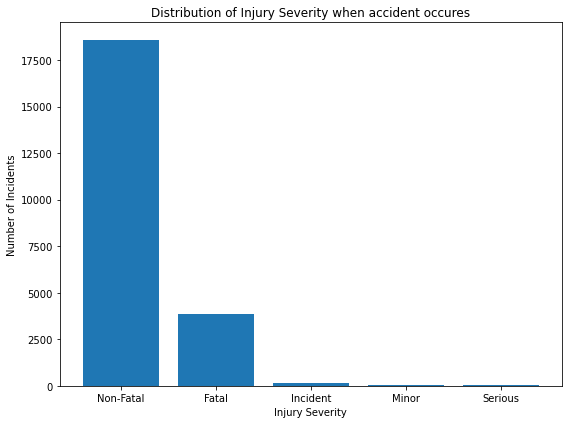

In [205]:
# distrubution of severity
plt.figure(figsize=(8,6))
plt.bar(severity_counts.index, severity_counts.values)

plt.title('Distribution of Injury Severity when accident occures')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')

plt.tight_layout()
plt.show()

##### Risk Analysis Based on `Injury.Severity` Distribution
- The large proportion of non-fatal injuries suggests that operational risk is often moderate but frequent, requiring careful safety management and aircraft selection.

- The substantial number of fatal injuries highlights the importance of choosing aircraft with lower historical fatality rates, as fatalities carry the greatest human, financial, and legal consequences.

- The rarity of minor or serious injuries emphasizes that incidents are rarely negligible in impact; even “less severe” events are significant relative to operational planning.

<b>Recommendation</b>- Airplanes with <b>lower fatality and serious injury counts</b> should <b>be prioritized</b> to minimize safety and operational risk.

In [206]:
# injury severity vs number of engines
engines_severity_risk = df_1.groupby('Injury.Severity')['Number.of.Engines'].sum().sort_values()
engines_severity_risk

Injury.Severity
Serious         20.0
Minor           58.0
Incident       240.0
Fatal         4311.0
Non-Fatal    20215.0
Name: Number.of.Engines, dtype: float64

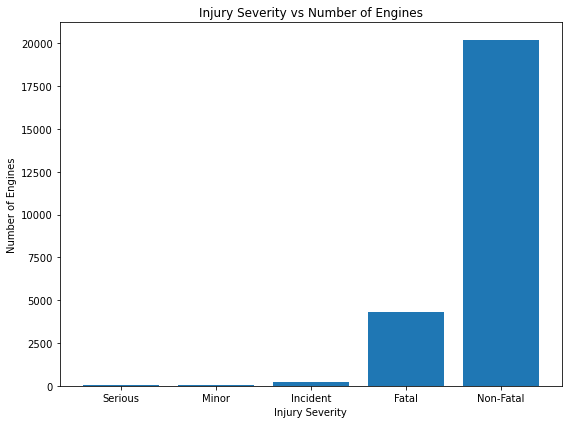

In [207]:
# visualizing the severity vs number of engines
plt.figure(figsize=(8,6))
plt.bar(engines_severity_risk.index, engines_severity_risk.values)

plt.title('Injury Severity vs Number of Engines')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Engines')

plt.tight_layout()
plt.show()

##### Risk Analysis Based  on `Injury.Severity` vs. `Number.of.Engines`
<b>Non-Fatal injuries (20,207 engines)</b> dominate the dataset, indicating that <b>most engine-involved incidents result in injuries that are survivable</b>, though still operationally disruptive.

<b>Fatal injuries (4,311 engines)</b> represent a significant share, highlighting that engine-related incidents can escalate into <b>high-severity outcomes</b>, especially in complex or high-energy events.

Incidents without injuries (240 engines) are relatively rare, suggesting that engine-related events often lead to measurable human impact.

Minor (58 engines) and Serious injuries (20 engines) occur infrequently, reinforcing that incidents tend to cluster at either non-fatal or fatal extremes, rather than moderate outcomes.

<b>Recommendation</b>- Engine involvement is strongly linked to injury severity. Therefore, the company should focus on aircraft with engine configurations and safety records that limit fatal outcomes, ensuring safer and more reliable operations as it enters the aviation sector.


In [208]:
# distribution of the type of damage encountred
damage_counts = df_1['Aircraft.damage'].value_counts()
damage_counts

Substantial    19414
Destroyed       2704
Minor            540
Unknown            6
Name: Aircraft.damage, dtype: int64

In [209]:
# excluding the 'Unknown' category
df_1 = df_1[df_1['Aircraft.damage'] != 'Unknown']


In [210]:
damage_counts = df_1['Aircraft.damage'].value_counts()
damage_counts


Substantial    19414
Destroyed       2704
Minor            540
Name: Aircraft.damage, dtype: int64

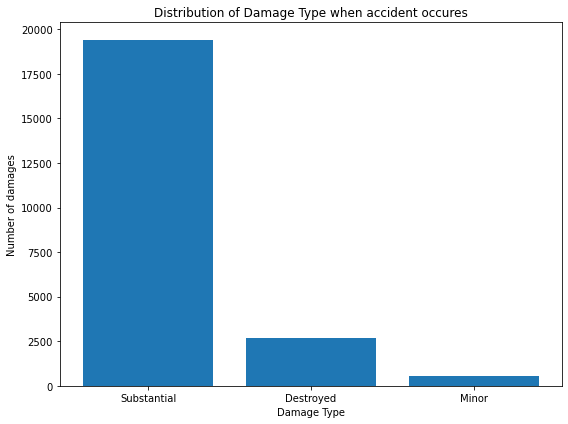

In [211]:
# visualizing the severity vs number of engines
plt.figure(figsize=(8,6))
plt.bar(damage_counts.index, damage_counts.values)

plt.title('Distribution of Damage Type when accident occures')
plt.xlabel('Damage Type')
plt.ylabel('Number of damages')

plt.tight_layout()
plt.show()

##### Analysis Based on `Aircraft.Damage` Distribution and Risk Implications
- The <b>high number of Substantial damage</b> incidents indicates that many airplanes <b>are exposed to serious repair costs</b>, even when incidents are non-fatal.

- <b>Destroyed aircraft</b>, while it has less frequency, it <b>poses the highest financial and safety risk</b>, often associated with severe accidents and potential fatalities.

- <b>Minor damage</b> events are comparatively rare, meaning aircraft incidents <b>rarely have minimal impact</b>.

The dominance of <b>Substantial and Destroyed damage</b> outcomes underscores the importance of <b>prioritizing aircraft with lower damage severity profiles</b>. This analysis strengthens decision-making by ensuring the company selects aircraft that are safer, more cost-effective, and operationally reliable over time.



In [212]:
# mapping the 'average_injuries_encounterd' into my df_1 dataframe
df_1['Avg_Injuries_per_Incident'] = df_1['Airplane.Type'].map(risk_per_incident['Average_Injuries_encountered'])
df_1.head(10)


,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Make,Model,Aircraft.Category,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Airplane.Type,Total.Injuries,Risk.Score,Avg_Injuries_per_Incident
5,Non-Fatal,0.0,0.0,1.0,44.0,Mcdonnell Douglas,DC9,Airplane,Substantial,No,2.0,Turbo Fan,NaN,mcdonnell douglas dc9,1.0,1.0,1.000000
7,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,140,Airplane,Substantial,No,1.0,Reciprocating,Personal,cessna 140,0.0,0.0,0.400000
8,Non-Fatal,0.0,0.0,0.0,2.0,Cessna,401B,Airplane,Substantial,No,2.0,Reciprocating,Business,cessna 401b,0.0,0.0,0.000000
12,Non-Fatal,0.0,0.0,1.0,0.0,Bellanca,17-30A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,bellanca 17-30a,1.0,1.0,0.862069
13,Fatal,1.0,0.0,0.0,0.0,Cessna,R172K,Airplane,Destroyed,No,1.0,Reciprocating,Personal,cessna r172k,1.0,3.0,0.888889
14,Fatal,1.0,0.0,0.0,0.0,Navion,A,Airplane,Destroyed,No,1.0,Reciprocating,Personal,navion a,1.0,3.0,2.000000
15,Fatal,2.0,0.0,0.0,0.0,Beech,19,Airplane,Destroyed,No,1.0,Reciprocating,Personal,beech 19,2.0,6.0,0.500000
17,Fatal,3.0,0.0,0.0,0.0,Cessna,180,Airplane,Destroyed,No,1.0,Reciprocating,Personal,cessna 180,3.0,9.0,0.334802
18,Non-Fatal,0.0,0.0,0.0,1.0,Cessna,172,Airplane,Substantial,No,1.0,Reciprocating,Personal,cessna 172,0.0,0.0,0.535326
20,Non-Fatal,0.0,0.0,0.0,1.0,Cessna,152,Airplane,Substantial,No,1.0,Reciprocating,Instructional,cessna 152,0.0,0.0,0.317961


In [213]:
# creating another dataframe having('Average_Injuries_encountered, Risk.Score,Aircraft.damage and Injury Severity) columns

df_2 = df_1[['Airplane.Type','Aircraft.damage', 'Risk.Score', 'Injury.Severity','Avg_Injuries_per_Incident']]
df_2

,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident
5,mcdonnell douglas dc9,Substantial,1.0,Non-Fatal,1.000000
7,cessna 140,Substantial,0.0,Non-Fatal,0.400000
8,cessna 401b,Substantial,0.0,Non-Fatal,0.000000
12,bellanca 17-30a,Destroyed,1.0,Non-Fatal,0.862069
13,cessna r172k,Destroyed,3.0,Fatal,0.888889
...,...,...,...,...,...
90098,cessna 150,Substantial,0.0,Non-Fatal,0.564815
90106,cessna 177rg,Substantial,0.0,Non-Fatal,0.771930
90120,beech b-60,Substantial,0.0,Non-Fatal,1.000000
90194,stephen j hoffman ms-500,Substantial,2.0,Minor,1.000000


In [214]:
df_2.isna().sum()

Airplane.Type                0
Aircraft.damage              0
Risk.Score                   0
Injury.Severity              0
Avg_Injuries_per_Incident    0
dtype: int64

In [215]:
# Assigning numerical values to the damage severity
damage_mapping = {
    'Minor': 1,
    'Substantial': 2,
    'Destroyed': 3
}

df_2['Damage_Risk'] = df_2['Aircraft.damage'].map(damage_mapping)
df_2.head(10)

<ipython-input-215-e8f9c6c10654>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Damage_Risk'] = df_2['Aircraft.damage'].map(damage_mapping)


,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk
5,mcdonnell douglas dc9,Substantial,1.0,Non-Fatal,1.000000,2
7,cessna 140,Substantial,0.0,Non-Fatal,0.400000,2
8,cessna 401b,Substantial,0.0,Non-Fatal,0.000000,2
12,bellanca 17-30a,Destroyed,1.0,Non-Fatal,0.862069,3
13,cessna r172k,Destroyed,3.0,Fatal,0.888889,3
14,navion a,Destroyed,3.0,Fatal,2.000000,3
15,beech 19,Destroyed,6.0,Fatal,0.500000,3
17,cessna 180,Destroyed,9.0,Fatal,0.334802,3
18,cessna 172,Substantial,0.0,Non-Fatal,0.535326,2
20,cessna 152,Substantial,0.0,Non-Fatal,0.317961,2


In [216]:
# assignin numerical values to the injury severity
severity_mapping = {
    'Non-Fatal': 1,
    'Fatal': 2,
    'Incident': 3,
    'Minor': 4,
    'Serious': 5
}

df_2['Severity_Risk'] = df_2['Injury.Severity'].map(severity_mapping)
df_2.head(10)

<ipython-input-216-d541b063c545>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Severity_Risk'] = df_2['Injury.Severity'].map(severity_mapping)


,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk,Severity_Risk
5,mcdonnell douglas dc9,Substantial,1.0,Non-Fatal,1.000000,2,1
7,cessna 140,Substantial,0.0,Non-Fatal,0.400000,2,1
8,cessna 401b,Substantial,0.0,Non-Fatal,0.000000,2,1
12,bellanca 17-30a,Destroyed,1.0,Non-Fatal,0.862069,3,1
13,cessna r172k,Destroyed,3.0,Fatal,0.888889,3,2
14,navion a,Destroyed,3.0,Fatal,2.000000,3,2
15,beech 19,Destroyed,6.0,Fatal,0.500000,3,2
17,cessna 180,Destroyed,9.0,Fatal,0.334802,3,2
18,cessna 172,Substantial,0.0,Non-Fatal,0.535326,2,1
20,cessna 152,Substantial,0.0,Non-Fatal,0.317961,2,1


##### Creating a Weighted Risk Score
To identify the <b>lowest-risk aircraft</b> for purchase and operation, we combine multiple safety dimensions into a single metric called `Weighted_Risk`. This composite score reflects how different risk factors <b>compound</b> to influence overall airplane safety.

In [217]:
# weight each component based on Risk.Score,Average injuries per incident and Damage severity
df_2['Weighted_Risk'] = df_2['Risk.Score'] * df_2['Avg_Injuries_per_Incident'] * df_2['Damage_Risk'] * df_2['Severity_Risk'].mean()
df_2.head(10)

<ipython-input-217-bcc369e8afc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Weighted_Risk'] = df_2['Risk.Score'] * df_2['Avg_Injuries_per_Incident'] * df_2['Damage_Risk'] * df_2['Severity_Risk'].mean()


,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk,Severity_Risk,Weighted_Risk
5,mcdonnell douglas dc9,Substantial,1.0,Non-Fatal,1.000000,2,1,2.389443
7,cessna 140,Substantial,0.0,Non-Fatal,0.400000,2,1,0.000000
8,cessna 401b,Substantial,0.0,Non-Fatal,0.000000,2,1,0.000000
12,bellanca 17-30a,Destroyed,1.0,Non-Fatal,0.862069,3,1,3.089797
13,cessna r172k,Destroyed,3.0,Fatal,0.888889,3,2,9.557772
14,navion a,Destroyed,3.0,Fatal,2.000000,3,2,21.504987
15,beech 19,Destroyed,6.0,Fatal,0.500000,3,2,10.752494
17,cessna 180,Destroyed,9.0,Fatal,0.334802,3,2,10.799861
18,cessna 172,Substantial,0.0,Non-Fatal,0.535326,2,1,0.000000
20,cessna 152,Substantial,0.0,Non-Fatal,0.317961,2,1,0.000000


In [218]:
# groupinf the columns airplane type and weighted risk
aircraft_weighted_risk = (df_2.groupby('Airplane.Type')['Weighted_Risk'].mean().sort_values())
aircraft_weighted_risk

Airplane.Type
hiller uh-12e                                          0.000000
israel aircraft industries 1125 westwind astra         0.000000
israel aircraft industries gulfstream 200              0.000000
j. schilling s-19                                      0.000000
jabat, inc. avid flyer                                 0.000000
                                                      ...      
boeing 747-2b6b                                   172517.786212
boeing 777-200er                                  226770.090034
boeing b757                                       286847.855945
airbus industrie a 310                            331689.338424
boeing 747-300                                    670038.054550
Name: Weighted_Risk, Length: 6425, dtype: float64

In [219]:
# highest weighted risk above 1000 weighted risk
high_risk_aircraft = df_2[df_2['Weighted_Risk'] > 1000]
high_risk_aircraft

,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk,Severity_Risk,Weighted_Risk
155,mcdonnell douglas dc-10-30,Destroyed,38.0,Fatal,26.250000,3,2,3575.204122
377,de havilland dhc-6,Destroyed,24.0,Fatal,12.000000,3,2,1032.239386
1343,douglas dc10-10,Substantial,25.0,Non-Fatal,25.000000,2,1,1493.401889
1969,mcdonnell douglas dc-10-10,Minor,33.0,Non-Fatal,26.000000,1,1,1025.071057
2133,robertson c-414,Destroyed,36.0,Fatal,12.000000,3,2,1548.359078
5960,"lockheed learstar, l-18-56",Destroyed,37.0,Fatal,13.000000,3,2,1723.983141
30062,fokker 28-4000,Destroyed,111.0,Fatal,48.000000,3,2,19096.428634
30231,de havilland dhc-6-200,Destroyed,60.0,Fatal,10.000000,3,2,2150.498720
36581,boeing 737-400,Destroyed,204.0,Fatal,75.000000,3,2,54837.717363
38846,boeing b757,Destroyed,488.0,Fatal,164.000000,3,2,286847.855945


In [220]:
# top 10 aircraft with highest weighted risk
safest_10 = high_risk_aircraft.head(10)
safest_10

,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk,Severity_Risk,Weighted_Risk
155,mcdonnell douglas dc-10-30,Destroyed,38.0,Fatal,26.25,3,2,3575.204122
377,de havilland dhc-6,Destroyed,24.0,Fatal,12.00,3,2,1032.239386
1343,douglas dc10-10,Substantial,25.0,Non-Fatal,25.00,2,1,1493.401889
1969,mcdonnell douglas dc-10-10,Minor,33.0,Non-Fatal,26.00,1,1,1025.071057
2133,robertson c-414,Destroyed,36.0,Fatal,12.00,3,2,1548.359078
5960,"lockheed learstar, l-18-56",Destroyed,37.0,Fatal,13.00,3,2,1723.983141
30062,fokker 28-4000,Destroyed,111.0,Fatal,48.00,3,2,19096.428634
30231,de havilland dhc-6-200,Destroyed,60.0,Fatal,10.00,3,2,2150.498720
36581,boeing 737-400,Destroyed,204.0,Fatal,75.00,3,2,54837.717363
38846,boeing b757,Destroyed,488.0,Fatal,164.00,3,2,286847.855945


In [221]:
# grouping the columns airplane type and weighted risk
high_risk_by_aircraft = (high_risk_aircraft.groupby('Airplane.Type')['Weighted_Risk'].mean().sort_values(ascending=False).round(2))
high_risk_by_aircraft

Airplane.Type
boeing 747-300                    670038.05
airbus industrie a 310            331689.34
boeing b757                       286847.86
boeing 777-200er                  226770.09
boeing 747-2b6b                   172517.79
fokker 100                        111119.85
airbus a321                        66259.55
boeing 737-400                     54837.72
boeing 767-200er                   45429.29
embraer erj190                     36477.83
airbus a330                        31388.32
airbus a320                        30153.58
sukhoi sj100                       20816.83
mcdonnell douglas md-11            20480.94
fokker 28-4000                     19096.43
boeing 737 7h4                     14759.59
boeing 767                         10485.89
bombardier inc dhc-8-402            8605.58
boeing 737                          8418.29
embraer emb110                      8028.53
mcdonnell douglas dc-10-30          7479.70
boeing 737-300                      4492.03
airbus a320 - 211 

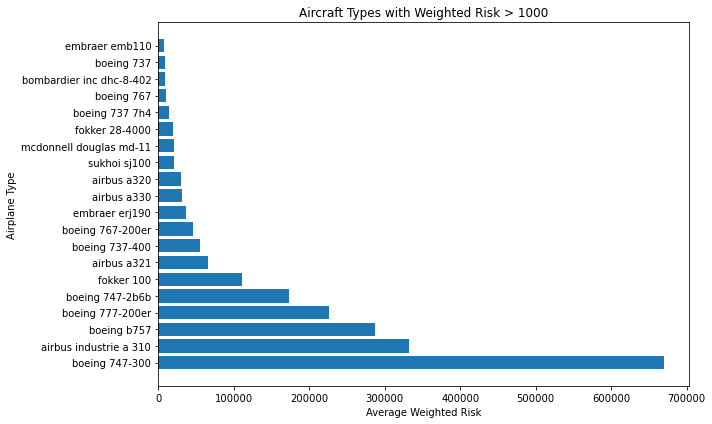

In [222]:
# top 10 aircraft with highest weighted risk
top_high_risk = high_risk_by_aircraft.head(20)

plt.figure(figsize=(10,6))
plt.barh(top_high_risk.index, top_high_risk.values)

plt.title('Aircraft Types with Weighted Risk > 1000')
plt.xlabel('Average Weighted Risk')
plt.ylabel('Airplane Type')

plt.tight_layout()
plt.show()

##### Risk Analysis Based on `Weighted_Risk` vs `Airplane.Type`
The dataset <b>shows a wide risk gap,</b> with weighted risk values spanning five orders of magnitude, <b>clearly separating aircraft into high-risk vs low-risk categories.</b>

- <b>High capacity commercial jets dominate the highest risk end of the spectrum:</b>

boeing 747-300, airbus a310, boeing 757, boeing 777-200er <b>show extremely high weighted risk values</b>.

These aircraft <b>operate in high-energy, high-occupancy environments,</b> where accidents though less frequent, <b>has severe consequences when they occur</b>.

The large weighted values indicate compounded risk driven by fatalities, substantial damage, and severe outcomes.

- <b>General aviation airplane dominate the lowest-risk end:</b>

Aircraft such as cessna 152, cessna 172g, ecssna 180h, taylorcraft bC12-d <b>have very low weighted risk scores</b>.

These airplanes <b>are typically smaller, lower-speed, and lower-capacity,</i> resulting in <b>fewer severe injuries and less catastrophic damage.</b>

##### `Amateur.Built` vs `Aircraft.Damage`  

In [223]:
# amateur built vs damage encountered
damage_aircraft_risk = df_1.groupby('Amateur.Built')['Aircraft.damage'].count().sort_values()
damage_aircraft_risk

Amateur.Built
Yes     2893
No     19765
Name: Aircraft.damage, dtype: int64

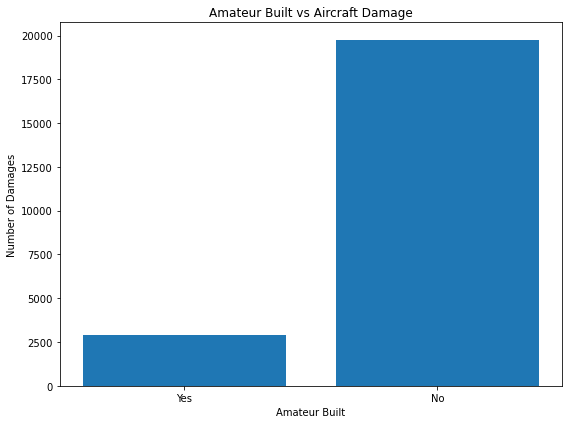

In [224]:
# visualizing the amateur built vs damage encountered
plt.figure(figsize=(8,6))
plt.bar(damage_aircraft_risk.index, damage_aircraft_risk.values)

plt.title('Amateur Built vs Aircraft Damage')
plt.xlabel('Amateur Built')
plt.ylabel('Number of Damages')

plt.tight_layout()
plt.show()

#### Analysis based on `Amateur.built` vs `Aircraft.damage`.
Airplanes that are amateur built encounter <b>less damage</b> compared to the one that are not amateur built due to a greater operational use

This analysis shows that aircraft usage patterns strongly influence damage counts. The company should prioritize factory-built aircraft with strong safety records, while recognizing that amateur-built aircraft may appear lower-risk due to lower operational exposure, not necessarily superior safety.

Impact it brings to the business:
- Minimizes operational risk and ensures long-term scalability

In [230]:
# adding the column 'Number.of.Engines found in df_1 to df_2
df_2['Number.of.Engines'] = df_1['Number.of.Engines']
df_2.head()


<ipython-input-230-6bb0b3a0e3e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Number.of.Engines'] = df_1['Number.of.Engines']


,Airplane.Type,Aircraft.damage,Risk.Score,Injury.Severity,Avg_Injuries_per_Incident,Damage_Risk,Severity_Risk,Weighted_Risk,Number.of.Engines
5,mcdonnell douglas dc9,Substantial,1.0,Non-Fatal,1.000000,2,1,2.389443,2.0
7,cessna 140,Substantial,0.0,Non-Fatal,0.400000,2,1,0.000000,1.0
8,cessna 401b,Substantial,0.0,Non-Fatal,0.000000,2,1,0.000000,2.0
12,bellanca 17-30a,Destroyed,1.0,Non-Fatal,0.862069,3,1,3.089797,1.0
13,cessna r172k,Destroyed,3.0,Fatal,0.888889,3,2,9.557772,1.0


In [232]:
# creating a new csv file
tableau_df = df_2.groupby('Airplane.Type').agg({'Avg_Injuries_per_Incident': 'mean','Risk.Score': 'mean','Weighted_Risk': 'mean','Damage_Risk': 'mean','Severity_Risk': 'mean', 'Number.of.Engines':'mean'}).reset_index()
tableau_df.to_csv('aviation_risk_tableau.csv', index=False)
tableau_df.head()

,Airplane.Type,Avg_Injuries_per_Incident,Risk.Score,Weighted_Risk,Damage_Risk,Severity_Risk,Number.of.Engines
0,177mf llc pitts model 12,2.0,4.0,19.115544,2.0,1.0,1.0
1,2007 savage air llc epic lt,0.0,0.0,0.000000,1.0,1.0,1.0
2,2021fx3 llc ccx-2000,0.0,0.0,0.000000,2.0,1.0,1.0
3,3xtrim 450 ultra,2.0,4.0,28.673316,3.0,2.0,1.0
4,781569 inc fx 210,3.0,6.0,43.009974,2.0,1.0,1.0
